In [10]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

%pylab inline
# large figures
rcParams['figure.figsize'] = 8, 6
print(tf.__version__)

Populating the interactive namespace from numpy and matplotlib
2.2.0-rc4


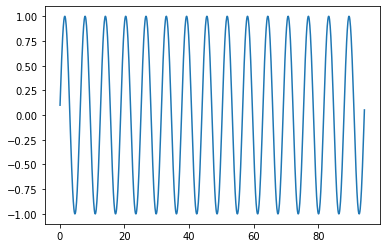

943


In [2]:
##
## generate data - a simple sine
##
x = np.arange(0.1, 30 * np.pi + 0.1, 0.1) #shift away from exactly zero
y = np.sin(x)
plt.plot(x, y)
plt.show() 
print(len(y))

In [0]:
##
## transform data into a sliding window of n points each
##

#use 50 points for the window width
sequence_length = 50 +1
sequence = []
for index in range(len(y) - sequence_length):
  sequence.append(y[index: index + sequence_length])
  
sequence = np.array(sequence)

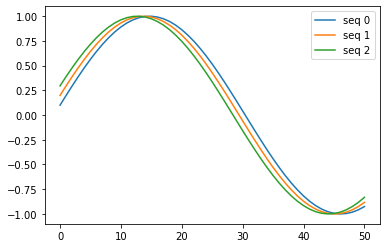

In [5]:
plt.plot(sequence[0], label='seq 0')
plt.plot(sequence[1], label='seq 1')
plt.plot(sequence[2], label='seq 2')
plt.legend()
plt.show()


In [6]:
#use 90% for trainig, 10% for testing
train_index = round(0.9 * len(sequence))
print('train index {}'.format(train_index))

train = sequence[:int(train_index), :]
#np.random.shuffle(train)
x_train = train[:, :-1]
y_train = train[:, -1]
x_test  = sequence[int(train_index):, :-1]
y_test  = sequence[int(train_index):, -1]

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

print(x_train.shape)


train index 803
(803, 50, 1)


In [11]:
###
### build the model
###

model = tf.keras.Sequential()

model.add(layers.LSTM(units=50, input_shape=(50,1), return_sequences=True ))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units=100, return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=1))
model.add(layers.Activation('linear'))

model.compile(loss='mse', optimizer='adam')

###
### fit model
###
history = model.fit(x_train,y_train, batch_size=256, epochs=100, validation_split=0.05)

Epoch 1/100
3/3 [==============================] - 1s 455ms/step - loss: 0.5261 - val_loss: 0.3397
Epoch 2/100
3/3 [==============================] - 1s 188ms/step - loss: 0.3620 - val_loss: 0.2393
Epoch 3/100
3/3 [==============================] - 1s 194ms/step - loss: 0.2365 - val_loss: 0.1454
Epoch 4/100
3/3 [==============================] - 1s 190ms/step - loss: 0.1151 - val_loss: 0.0243
Epoch 5/100
3/3 [==============================] - 1s 188ms/step - loss: 0.0207 - val_loss: 0.0474
Epoch 6/100
3/3 [==============================] - 1s 189ms/step - loss: 0.0492 - val_loss: 0.0158
Epoch 7/100
3/3 [==============================] - 1s 186ms/step - loss: 0.0132 - val_loss: 0.0027
Epoch 8/100
3/3 [==============================] - 1s 188ms/step - loss: 0.0104 - val_loss: 0.0125
Epoch 9/100
3/3 [==============================] - 1s 192ms/step - loss: 0.0193 - val_loss: 0.0134
Epoch 10/100
3/3 [==============================] - 1s 190ms/step - loss: 0.0155 - val_loss: 0.0067
Epoch 11/

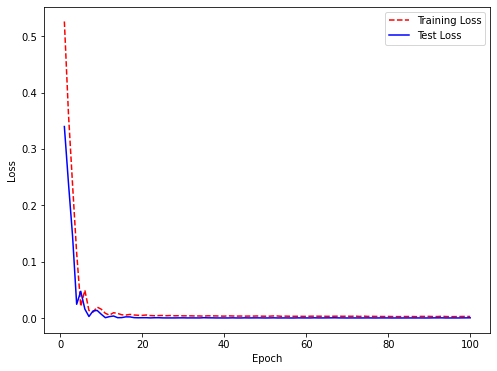

In [12]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

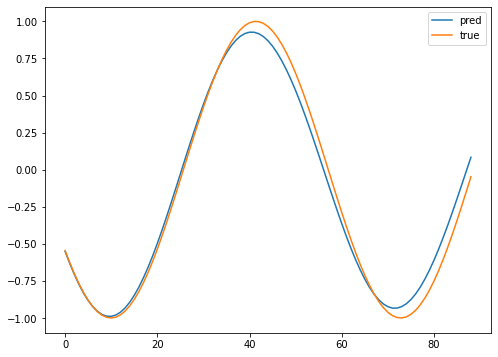

In [13]:
###
### Prediction
### sliding window, one step ahead
###

# start from the first window in the test data, i.e. sequence_length number of points
# with shape (sequence_length,1)
current_window = x_test[0]
prediction = []

for i in range(len(x_test)):
#for i in range(2):
    #LSTM cell expects 3D shape, add a new axis
    data_point = current_window[np.newaxis,:,:]
    
    #get a single number from the returned shape as the prediction
    pred = model.predict(data_point)[0,0]
    prediction.append(pred)
    # print(pred)
    
    #advance the input window to the LSTM cell, move the sequence one step up, add the prediction as the last number
    current_window = current_window[1:]
    current_window = np.insert(current_window,[50-1], values=prediction[-1], axis=0)
    

plt.plot(prediction, label='pred')
plt.plot(y_test, label='true')
plt.legend()
plt.show()